# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
!cat api_keys.py

# OpenWeatherMap API Key
weather_api_key = "e03356a0ce25d940217bf57988fa5332"

# Geoapify API Key
geoapify_key = "68e79185172a472c82d20c673f6a5628"


In [13]:
geoapify_key


'68e79185172a472c82d20c673f6a5628'

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

In [16]:
weather_api_key


'e03356a0ce25d940217bf57988fa5332'

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(json.dumps(city_weather, indent=4, sort_keys=True))
        
#     except Exception as e:
#         print(e)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
Processing Record 1 of Set 1 | puerto natales
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -51.7236,
        "lon": -72.4875
    },
    "dt": 1701109155,
    "id": 3874958,
    "main": {
        "feels_like": 11.49,
        "humidity": 33,
        "pressure": 999,
        "temp": 13.25,
        "temp_max": 13.25,
        "temp_min": 13.25
    },
    "name": "Puerto Natales",
    "sys": {
        "country": "CL",
        "id": 8495,
        "sunrise": 1701074036,
        "sunset": 1701132088,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 3.09
    }
}
Processing Record 2 of Set 1 | ilulissat
{
    "base": "stations",
    "clouds": {
        "all": 75
    

{
    "base": "stations",
    "clouds": {
        "all": 27
    },
    "cod": 200,
    "coord": {
        "lat": 41.2971,
        "lon": 124.1209
    },
    "dt": 1701109160,
    "id": 2033934,
    "main": {
        "feels_like": -15.23,
        "grnd_level": 996,
        "humidity": 78,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": -10.53,
        "temp_max": -10.53,
        "temp_min": -10.53
    },
    "name": "Xiaoshi",
    "sys": {
        "country": "CN",
        "sunrise": 1701125161,
        "sunset": 1701159409
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 306,
        "gust": 6.61,
        "speed": 2.32
    }
}
Processing Record 13 of Set 1 | whitehorse
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -22.9661,
        "lon": -42.0278
    },
    "dt": 1701109163,
    "id": 3471451,
    "main": {
        "feels_like": 26.47,
        "humidity": 73,
        "pressure": 1017,
        "temp": 25.92,
        "temp_max": 28.98,
        "temp_min": 25.92
    },
    "name": "Arraial do Cabo",
    "sys": {
        "country": "BR",
        "id": 8326,
        "sunrise": 1701071657,
        "sunset": 1701119843,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 8.75
    }
}
Processing Record 23 of Set 1 | vadso
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 70.0744,
        "lon": 

{
    "base": "stations",
    "clouds": {
        "all": 52
    },
    "cod": 200,
    "coord": {
        "lat": 23.0817,
        "lon": 77.5333
    },
    "dt": 1701109167,
    "id": 7279752,
    "main": {
        "feels_like": 17.46,
        "grnd_level": 963,
        "humidity": 83,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 17.49,
        "temp_max": 17.49,
        "temp_min": 17.49
    },
    "name": "Mandideep",
    "sys": {
        "country": "IN",
        "id": 9063,
        "sunrise": 1701047477,
        "sunset": 1701086621,
        "type": 1
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 143,
        "gust": 2.41,
        "speed": 1.73
    }
}
Processing Record 33 of Set 1 | ushuaia
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 15.1355,
        "lon": 145.701
    },
    "dt": 1701109171,
    "id": 4041552,
    "main": {
        "feels_like": 31.74,
        "humidity": 89,
        "pressure": 1011,
        "temp": 27.39,
        "temp_max": 27.39,
        "temp_min": 27.39
    },
    "name": "Saipan",
    "sys": {
        "country": "MP",
        "id": 7855,
        "sunrise": 1701116726,
        "sunset": 1701157484,
        "type": 1
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 5.66
    }
}
Processing Record 43 of Set 1 | kadugli
{
    "base": "stations",
    "clouds": {
        "all": 12
    },
    "cod": 200,
    "coord": {
        "lat": 11.0167,
        "lon": 29.7167
  

{
    "base": "stations",
    "clouds": {
        "all": 43
    },
    "cod": 200,
    "coord": {
        "lat": 8.2833,
        "lon": -82.8667
    },
    "dt": 1701109175,
    "id": 3702431,
    "main": {
        "feels_like": 36.17,
        "humidity": 74,
        "pressure": 1008,
        "temp": 30.05,
        "temp_max": 31.99,
        "temp_min": 30.05
    },
    "name": "Puerto Armuelles",
    "sys": {
        "country": "PA",
        "id": 2083346,
        "sunrise": 1701084511,
        "sunset": 1701126597,
        "type": 2
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 215,
        "gust": 2.24,
        "speed": 3.13
    }
}
Processing Record 2 of Set 2 | taiohae
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Processing Record 3 of Set

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -34.4833,
        "lon": -54.3333
    },
    "dt": 1701109179,
    "id": 3440777,
    "main": {
        "feels_like": 27.41,
        "grnd_level": 1013,
        "humidity": 46,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 27.26,
        "temp_max": 27.26,
        "temp_min": 27.26
    },
    "name": "Rocha",
    "sys": {
        "country": "UY",
        "sunrise": 1701073147,
        "sunset": 1701124261
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 80,
        "gust": 6.66,
        "speed": 6.86
    }
}
Processing Record 12 of Set 2 | morehead city
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "l

{
    "base": "stations",
    "clouds": {
        "all": 8
    },
    "cod": 200,
    "coord": {
        "lat": 67.5,
        "lon": 64
    },
    "dt": 1701109183,
    "id": 1486910,
    "main": {
        "feels_like": -29.33,
        "grnd_level": 1008,
        "humidity": 98,
        "pressure": 1029,
        "sea_level": 1029,
        "temp": -22.67,
        "temp_max": -22.67,
        "temp_min": -22.67
    },
    "name": "Vorkuta",
    "sys": {
        "country": "RU",
        "sunrise": 1701063720,
        "sunset": 1701076876
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 63,
        "gust": 2.11,
        "speed": 2.22
    }
}
Processing Record 22 of Set 2 | manuel ojinaga
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Processing Record 23 of Set 2

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": -15.9169,
        "lon": -46.1056
    },
    "dt": 1701109185,
    "id": 3471522,
    "main": {
        "feels_like": 34.03,
        "grnd_level": 955,
        "humidity": 31,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 34.41,
        "temp_max": 34.41,
        "temp_min": 34.41
    },
    "name": "Arinos",
    "sys": {
        "country": "BR",
        "sunrise": 1701073390,
        "sunset": 1701120068
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 34,
        "gust": 3.16,
        "speed": 2.71
    }
}
Processing Record 33 of Set 2 | agdam
{
    "base": "stations",
    "clouds": {
        "all": 25
    },
    "cod": 200,
    "coord": {
        "

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 18.3328,
        "lon": 120.6177
    },
    "dt": 1701109188,
    "id": 1694484,
    "main": {
        "feels_like": 25.97,
        "humidity": 83,
        "pressure": 1011,
        "temp": 25.97,
        "temp_max": 25.97,
        "temp_min": 25.97
    },
    "name": "Pasuquin",
    "sys": {
        "country": "PH",
        "id": 8159,
        "sunrise": 1701123070,
        "sunset": 1701163182,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 2.06
    }
}
Processing Record 44 of Set 2 | udachny
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 66.4167,
        "lon": 112.4
    

{
    "base": "stations",
    "clouds": {
        "all": 91
    },
    "cod": 200,
    "coord": {
        "lat": -40.7319,
        "lon": -64.9477
    },
    "dt": 1701109088,
    "id": 3837980,
    "main": {
        "feels_like": 26.15,
        "grnd_level": 1008,
        "humidity": 40,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 26.15,
        "temp_max": 26.15,
        "temp_min": 26.15
    },
    "name": "San Antonio Oeste",
    "sys": {
        "country": "AR",
        "sunrise": 1701074695,
        "sunset": 1701127809
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 41,
        "gust": 11.33,
        "speed": 9.49
    }
}
Processing Record 4 of Set 3 | atherton
{
    "base": "stations",
    "clouds": {
        "all": 86
    },
    "cod": 200,
    "coor

{
    "base": "stations",
    "clouds": {
        "all": 27
    },
    "cod": 200,
    "coord": {
        "lat": 11.2278,
        "lon": 169.8474
    },
    "dt": 1701109194,
    "id": 7306518,
    "main": {
        "feels_like": 30.38,
        "grnd_level": 1010,
        "humidity": 76,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 27.49,
        "temp_max": 27.49,
        "temp_min": 27.49
    },
    "name": "Utrik",
    "sys": {
        "country": "MH",
        "sunrise": 1701110548,
        "sunset": 1701152069
    },
    "timezone": 43200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 66,
        "gust": 11.06,
        "speed": 10.06
    }
}
Processing Record 14 of Set 3 | isafjordur
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
  

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 20.7,
        "lon": -105.2
    },
    "dt": 1701109196,
    "id": 4004293,
    "main": {
        "feels_like": 26.57,
        "humidity": 61,
        "pressure": 1014,
        "temp": 26.57,
        "temp_max": 27.35,
        "temp_min": 26.57
    },
    "name": "Ixtapa",
    "sys": {
        "country": "MX",
        "id": 7156,
        "sunrise": 1701091099,
        "sunset": 1701130731,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 1.54
    }
}
Processing Record 24 of Set 3 | ketou
{
    "base": "stations",
    "clouds": {
        "all": 88
    },
    "cod": 200,
    "coord": {
        "lat": 7.3633,
        "lon": 2.5998
    },

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 11.0667,
        "lon": 76.0667
    },
    "dt": 1701109199,
    "id": 1264154,
    "main": {
        "feels_like": 26.09,
        "humidity": 83,
        "pressure": 1010,
        "temp": 26.09,
        "temp_max": 26.09,
        "temp_min": 26.09
    },
    "name": "Malappuram",
    "sys": {
        "country": "IN",
        "id": 9209,
        "sunrise": 1701046618,
        "sunset": 1701088184,
        "type": 1
    },
    "timezone": 19800,
    "visibility": 6000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 1.54
    }
}
Processing Record 34 of Set 3 | talnakh
{
    "base": "stations",
    "clouds": {
        "all": 71
    },
    "cod": 200,
    "coord": {
        "lat": 69.4865,
        "lon": 88.3972
  

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 34.4133,
        "lon": -119.861
    },
    "dt": 1701109202,
    "id": 5359864,
    "main": {
        "feels_like": 19.61,
        "humidity": 26,
        "pressure": 1019,
        "temp": 20.8,
        "temp_max": 22.39,
        "temp_min": 17.36
    },
    "name": "Isla Vista",
    "sys": {
        "country": "US",
        "id": 5773,
        "sunrise": 1701096250,
        "sunset": 1701132618,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 2.06
    }
}
Processing Record 44 of Set 3 | shimoda
{
    "base": "stations",
    "clouds": {
        "all": 73
    },
    "cod": 200,
    "coord": {
        "lat": 34.6667,
        "lon": 138.95
    }

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 8.484,
        "lon": -13.2299
    },
    "dt": 1701109207,
    "id": 2409306,
    "main": {
        "feels_like": 35.61,
        "humidity": 74,
        "pressure": 1009,
        "temp": 29.84,
        "temp_max": 29.84,
        "temp_min": 29.84
    },
    "name": "Freetown",
    "sys": {
        "country": "SL",
        "id": 2368,
        "sunrise": 1701067812,
        "sunset": 1701109862,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 6.17
    }
}
Processing Record 4 of Set 4 | st. john's
{
    "base": "stations",
    "clouds": {
        "all": 49
    },
    "cod": 200,
    "coord": {
        "lat": 47.5649,
        "lon": -52.7093
    

{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": -3.41,
        "lon": -39.0306
    },
    "dt": 1701109211,
    "id": 3393115,
    "main": {
        "feels_like": 30.57,
        "grnd_level": 1008,
        "humidity": 64,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 28.39,
        "temp_max": 28.39,
        "temp_min": 28.39
    },
    "name": "Paracuru",
    "sys": {
        "country": "BR",
        "id": 2008290,
        "sunrise": 1701072901,
        "sunset": 1701117161,
        "type": 2
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 71,
        "gust": 7.82,
        "speed": 6.37
    }
}
Processing Record 15 of Set 4 | palmer
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -28.7667,
        "lon": 114.6
    },
    "dt": 1701109215,
    "id": 2070998,
    "main": {
        "feels_like": 21.18,
        "humidity": 68,
        "pressure": 1008,
        "temp": 21.23,
        "temp_max": 21.23,
        "temp_min": 21.23
    },
    "name": "Geraldton",
    "sys": {
        "country": "AU",
        "id": 9522,
        "sunrise": 1701119771,
        "sunset": 1701169370,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 5.14
    }
}
Processing Record 25 of Set 4 | feni
{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 23.0186,
        "lon": 91.41
 

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -21.2078,
        "lon": -159.775
    },
    "dt": 1701109219,
    "id": 4035715,
    "main": {
        "feels_like": 24.66,
        "humidity": 83,
        "pressure": 1015,
        "temp": 24.03,
        "temp_max": 24.03,
        "temp_min": 24.03
    },
    "name": "Avarua",
    "sys": {
        "country": "CK",
        "id": 7271,
        "sunrise": 1701100112,
        "sunset": 1701147920,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 5.14
    }
}
Processing Record 35 of Set 4 | beira
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -19.8436,
        "lon": 34.83

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 64.8,
        "lon": -147.5333
    },
    "dt": 1701109225,
    "id": 5879898,
    "main": {
        "feels_like": -13.85,
        "humidity": 89,
        "pressure": 995,
        "temp": -10.53,
        "temp_max": -7.02,
        "temp_min": -10.57
    },
    "name": "Badger",
    "sys": {
        "country": "US",
        "id": 2036575,
        "sunrise": 1701111896,
        "sunset": 1701130258,
        "type": 2
    },
    "timezone": -32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1.54
    }
}
Processing Record 47 of Set 4 | vila velha
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -20.3297,
        "lon": -4

{
    "base": "stations",
    "clouds": {
        "all": 26
    },
    "cod": 200,
    "coord": {
        "lat": -33.0117,
        "lon": 17.9442
    },
    "dt": 1701109229,
    "id": 3361934,
    "main": {
        "feels_like": 20.44,
        "grnd_level": 1011,
        "humidity": 90,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 20.03,
        "temp_max": 20.03,
        "temp_min": 20.03
    },
    "name": "Saldanha",
    "sys": {
        "country": "ZA",
        "id": 1943,
        "sunrise": 1701056013,
        "sunset": 1701106694,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 189,
        "gust": 14.29,
        "speed": 8.19
    }
}
Processing Record 8 of Set 5 | muroto-misakicho
{
    "base": "stations",
    "clouds": {
        "all"

{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Processing Record 18 of Set 5 | sanming
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 26.2486,
        "lon": 117.6186
    },
    "dt": 1701109233,
    "id": 1796663,
    "main": {
        "feels_like": 12.9,
        "grnd_level": 1006,
        "humidity": 90,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 13.18,
        "temp_max": 13.18,
        "temp_min": 13.18
    },
    "name": "Sanming",
    "sys": {
        "country": "CN",
        "sunrise": 1701124649,
        "sunset": 1701163044
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 32,
        "gust": 0.91,
        "speed": 0.9
    }
}
Processing Record 19 of Set 5 | g

{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "coord": {
        "lat": 69.1989,
        "lon": 33.4478
    },
    "dt": 1701109237,
    "id": 506763,
    "main": {
        "feels_like": -15.86,
        "grnd_level": 1024,
        "humidity": 94,
        "pressure": 1029,
        "sea_level": 1029,
        "temp": -10.66,
        "temp_max": -10.66,
        "temp_min": -10.66
    },
    "name": "Polyarny",
    "snow": {
        "1h": 0.14
    },
    "sys": {
        "country": "RU",
        "sunrise": 1701074216,
        "sunset": 1701081047
    },
    "timezone": 10800,
    "visibility": 3811,
    "weather": [
        {
            "description": "light snow",
            "icon": "13n",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 209,
        "gust": 2.25,
        "speed": 2.65
    }
}
Processing Record 29 of Set 5 | murray
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 72
    },
    "cod": 200,
    "coord": {
        "lat": 28.3667,
        "lon": 129.4833
    },
    "dt": 1701108975,
    "id": 1855540,
    "main": {
        "feels_like": 19.21,
        "grnd_level": 991,
        "humidity": 65,
        "pressure": 1018,
        "sea_level": 1018,
        "temp": 19.51,
        "temp_max": 19.51,
        "temp_min": 19.51
    },
    "name": "Naze",
    "sys": {
        "country": "JP",
        "id": 8013,
        "sunrise": 1701122049,
        "sunset": 1701159947,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 304,
        "gust": 8.38,
        "speed": 6.43
    }
}
Processing Record 38 of Set 5 | port hope
{
    "base": "stations",
    "clouds": {
        "all": 94
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 6.964,
        "lon": 158.206
    },
    "dt": 1701109246,
    "id": 2082038,
    "main": {
        "feels_like": 32.57,
        "humidity": 83,
        "pressure": 1009,
        "temp": 28,
        "temp_max": 28,
        "temp_min": 28
    },
    "name": "Kolonia Town",
    "rain": {
        "1h": 0.13
    },
    "sys": {
        "country": "FM",
        "id": 7907,
        "sunrise": 1701112938,
        "sunset": 1701155268,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 60,
        "speed": 2.57
    }
}
Processing Record 48 of Set 5 | carnarvon
{
    "base": "stations",
    "clouds": {
        "all": 93
    },
    "cod": 200,
    "coord": {
        "lat": -

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -42.6128,
        "lon": -73.8092
    },
    "dt": 1701109249,
    "id": 3894871,
    "main": {
        "feels_like": 15.47,
        "grnd_level": 1002,
        "humidity": 62,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 16.18,
        "temp_max": 16.18,
        "temp_min": 14.56
    },
    "name": "Chonchi",
    "sys": {
        "country": "CL",
        "id": 2043794,
        "sunrise": 1701076476,
        "sunset": 1701130282,
        "type": 2
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 326,
        "gust": 8.5,
        "speed": 3.54
    }
}
Processing Record 8 of Set 6 | ji'an
{
    "base": "stations",
    "clouds": {
        "all": 0
    

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -2.5333,
        "lon": 140.7
    },
    "dt": 1701109251,
    "id": 2082600,
    "main": {
        "feels_like": 24.33,
        "grnd_level": 992,
        "humidity": 86,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 23.66,
        "temp_max": 23.66,
        "temp_min": 23.66
    },
    "name": "Jayapura",
    "sys": {
        "country": "ID",
        "id": 9345,
        "sunrise": 1701116256,
        "sunset": 1701160355,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 120,
        "gust": 0.83,
        "speed": 0.23
    }
}
Processing Record 18 of Set 6 | saint-philippe
{
    "base": "stations",
    "clouds": {
        "all": 51


{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 53.0452,
        "lon": 158.6483
    },
    "dt": 1701109254,
    "id": 2122104,
    "main": {
        "feels_like": -12.86,
        "humidity": 63,
        "pressure": 997,
        "temp": -5.86,
        "temp_max": -5.86,
        "temp_min": -9.01
    },
    "name": "Petropavlovsk-Kamchatskiy",
    "sys": {
        "country": "RU",
        "id": 2088272,
        "sunrise": 1701119421,
        "sunset": 1701148573,
        "type": 2
    },
    "timezone": 43200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 282,
        "gust": 11.18,
        "speed": 7.15
    }
}
Processing Record 28 of Set 6 | rongelap
{
    "base": "stations",
    "clouds": {
        "all": 10
    },
    "cod": 200,
    "coord": {
 

{
    "base": "stations",
    "clouds": {
        "all": 46
    },
    "cod": 200,
    "coord": {
        "lat": 31.1667,
        "lon": 97.2333
    },
    "dt": 1701109257,
    "id": 1280281,
    "main": {
        "feels_like": -8.37,
        "grnd_level": 603,
        "humidity": 32,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": -5.44,
        "temp_max": -5.44,
        "temp_min": -5.44
    },
    "name": "Chamdo",
    "sys": {
        "country": "CN",
        "sunrise": 1701130139,
        "sunset": 1701167340
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 162,
        "gust": 1.73,
        "speed": 1.73
    }
}
Processing Record 39 of Set 6 | keflavik
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
      

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 22.6783,
        "lon": -3.9836
    },
    "dt": 1701109259,
    "id": 2450173,
    "main": {
        "feels_like": 21.04,
        "grnd_level": 1001,
        "humidity": 13,
        "pressure": 1017,
        "sea_level": 1017,
        "temp": 22.4,
        "temp_max": 22.4,
        "temp_min": 22.4
    },
    "name": "Taoudenni",
    "sys": {
        "country": "ML",
        "sunrise": 1701067006,
        "sunset": 1701106228
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 45,
        "gust": 3.87,
        "speed": 3.8
    }
}
Processing Record 49 of Set 6 | caxias
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 38.7031,

{
    "base": "stations",
    "clouds": {
        "all": 72
    },
    "cod": 200,
    "coord": {
        "lat": 48.7567,
        "lon": 98.2839
    },
    "dt": 1701109262,
    "id": 1515167,
    "main": {
        "feels_like": -21.58,
        "grnd_level": 831,
        "humidity": 99,
        "pressure": 1044,
        "sea_level": 1044,
        "temp": -21.58,
        "temp_max": -21.58,
        "temp_min": -21.58
    },
    "name": "Tosontsengel",
    "sys": {
        "country": "MN",
        "sunrise": 1701132829,
        "sunset": 1701164146
    },
    "timezone": 25200,
    "visibility": 5209,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 307,
        "gust": 1.24,
        "speed": 1.06
    }
}
Processing Record 9 of Set 7 | purulha
{
    "base": "stations",
    "clouds": {
        "all": 41
    },
    "cod": 200,
    "coord": {
   

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 9.535,
        "lon": -13.6878
    },
    "dt": 1701109266,
    "id": 2422488,
    "main": {
        "feels_like": 36.17,
        "humidity": 74,
        "pressure": 1010,
        "temp": 30.05,
        "temp_max": 30.05,
        "temp_min": 30.05
    },
    "name": "Camayenne",
    "sys": {
        "country": "GN",
        "id": 2451,
        "sunrise": 1701068021,
        "sunset": 1701109873,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 4.12
    }
}
Processing Record 18 of Set 7 | kalat
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 29.0225,
        "lon": 66.5916
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -36.3569,
        "lon": -56.7235
    },
    "dt": 1701109269,
    "id": 3429160,
    "main": {
        "feels_like": 23.61,
        "grnd_level": 1016,
        "humidity": 73,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 23.32,
        "temp_max": 23.32,
        "temp_min": 23.32
    },
    "name": "San Clemente del Tuy\u00fa",
    "sys": {
        "country": "AR",
        "id": 2083012,
        "sunrise": 1701073441,
        "sunset": 1701125115,
        "type": 2
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 83,
        "gust": 8.21,
        "speed": 6.91
    }
}
Processing Record 29 of Set 7 | fort bragg
{
    "base": "stations",
    "clouds": {
     

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 37.1882,
        "lon": -3.6067
    },
    "dt": 1701109137,
    "id": 2517117,
    "main": {
        "feels_like": 9.73,
        "humidity": 70,
        "pressure": 1015,
        "temp": 10.77,
        "temp_max": 12.6,
        "temp_min": 10.2
    },
    "name": "Granada",
    "sys": {
        "country": "ES",
        "id": 2005546,
        "sunrise": 1701068726,
        "sunset": 1701104328,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 270,
        "speed": 2.57
    }
}
Processing Record 39 of Set 7 | jasrasar
{
    "base": "stations",
    "clouds": {
        "all": 78
    },
    "cod": 200,
    "coord": {
        "lat": 28.298,
        "lon": 74.8093
    },


{
    "base": "stations",
    "clouds": {
        "all": 57
    },
    "cod": 200,
    "coord": {
        "lat": 68.906,
        "lon": 27.0288
    },
    "dt": 1701109276,
    "id": 656657,
    "main": {
        "feels_like": -21.89,
        "grnd_level": 1014,
        "humidity": 99,
        "pressure": 1031,
        "sea_level": 1031,
        "temp": -21.89,
        "temp_max": -21.89,
        "temp_min": -21.89
    },
    "name": "Inari",
    "sys": {
        "country": "FI",
        "id": 1339,
        "sunrise": 1701075017,
        "sunset": 1701083329,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 322,
        "gust": 0.97,
        "speed": 1.03
    }
}
Processing Record 49 of Set 7 | khovd
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": 9.4942,
        "lon": 50.8122
    },
    "dt": 1701109280,
    "id": 64814,
    "main": {
        "feels_like": 28.57,
        "grnd_level": 1012,
        "humidity": 72,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 26.74,
        "temp_max": 26.74,
        "temp_min": 26.74
    },
    "name": "Bandarbeyla",
    "sys": {
        "country": "SO",
        "sunrise": 1701052532,
        "sunset": 1701094395
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 37,
        "gust": 10.6,
        "speed": 8.71
    }
}
Processing Record 10 of Set 8 | rumson
{
    "base": "stations",
    "clouds": {
        "all": 6
    },
    "cod": 200,
    "coord": {
        "

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 56.6513,
        "lon": 32.2664
    },
    "dt": 1701109294,
    "id": 582105,
    "main": {
        "feels_like": -11.14,
        "grnd_level": 957,
        "humidity": 95,
        "pressure": 985,
        "sea_level": 985,
        "temp": -5.51,
        "temp_max": -5.51,
        "temp_min": -5.51
    },
    "name": "Andreapol'",
    "snow": {
        "1h": 0.88
    },
    "sys": {
        "country": "RU",
        "sunrise": 1701064432,
        "sunset": 1701091399
    },
    "timezone": 10800,
    "visibility": 120,
    "weather": [
        {
            "description": "snow",
            "icon": "13n",
            "id": 601,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 359,
        "gust": 10.26,
        "speed": 4.11
    }
}
Processing Record 20 of Set 8 | puerto lempira
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 52
    },
    "cod": 200,
    "coord": {
        "lat": -11.0925,
        "lon": -77.6267
    },
    "dt": 1701109042,
    "id": 3946147,
    "main": {
        "feels_like": 22.87,
        "grnd_level": 1009,
        "humidity": 72,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 22.67,
        "temp_max": 22.67,
        "temp_min": 22.67
    },
    "name": "Caleta de Carqu\u00edn",
    "sys": {
        "country": "PE",
        "sunrise": 1701081436,
        "sunset": 1701127156
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 199,
        "gust": 5.15,
        "speed": 5.06
    }
}
Processing Record 30 of Set 8 | happy valley-goose bay
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "co

{
    "base": "stations",
    "clouds": {
        "all": 69
    },
    "cod": 200,
    "coord": {
        "lat": 27.0333,
        "lon": 93.9
    },
    "dt": 1701109302,
    "id": 1275713,
    "main": {
        "feels_like": 15.57,
        "grnd_level": 1005,
        "humidity": 62,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 16.27,
        "temp_max": 16.27,
        "temp_min": 16.27
    },
    "name": "Bihpuri\u0101gaon",
    "sys": {
        "country": "IN",
        "sunrise": 1701043989,
        "sunset": 1701082251
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 19,
        "gust": 1.16,
        "speed": 1.11
    }
}
Processing Record 41 of Set 8 | kodinsk
{
    "base": "stations",
    "clouds": {
        "all": 43
    },
    "cod": 200,
    "coord": {
   

{
    "base": "stations",
    "clouds": {
        "all": 37
    },
    "cod": 200,
    "coord": {
        "lat": -19.5167,
        "lon": 45.4667
    },
    "dt": 1701109305,
    "id": 1059051,
    "main": {
        "feels_like": 31.43,
        "grnd_level": 999,
        "humidity": 55,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 29.72,
        "temp_max": 29.72,
        "temp_min": 29.72
    },
    "name": "Miandrivazo",
    "sys": {
        "country": "MG",
        "sunrise": 1701051037,
        "sunset": 1701098457
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 272,
        "gust": 5.13,
        "speed": 3.21
    }
}
Processing Record 1 of Set 9 | maragogi
{
    "base": "stations",
    "clouds": {
        "all": 35
    },
    "cod": 200,
    "coord": {
  

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 34.2257,
        "lon": -77.9447
    },
    "dt": 1701109307,
    "id": 4499379,
    "main": {
        "feels_like": 12.03,
        "humidity": 70,
        "pressure": 1012,
        "temp": 12.86,
        "temp_max": 13.95,
        "temp_min": 12.16
    },
    "name": "Wilmington",
    "sys": {
        "country": "US",
        "id": 2076500,
        "sunrise": 1701086158,
        "sunset": 1701122586,
        "type": 2
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 7.2
    }
}
Processing Record 10 of Set 9 | puerto aysen
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -45.4,
        "lon": -72

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -43.1167,
        "lon": -73.6167
    },
    "dt": 1701109311,
    "id": 3874943,
    "main": {
        "feels_like": 14.84,
        "grnd_level": 1008,
        "humidity": 69,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 15.44,
        "temp_max": 15.44,
        "temp_min": 15.44
    },
    "name": "Quell\u00f3n",
    "sys": {
        "country": "CL",
        "sunrise": 1701076334,
        "sunset": 1701130333
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 4,
        "gust": 7.69,
        "speed": 4.14
    }
}
Processing Record 20 of Set 9 | gandajika
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": 

{
    "base": "stations",
    "clouds": {
        "all": 11
    },
    "cod": 200,
    "coord": {
        "lat": -15.8631,
        "lon": -38.8828
    },
    "dt": 1701109316,
    "id": 3470137,
    "main": {
        "feels_like": 29.42,
        "grnd_level": 1014,
        "humidity": 54,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 28.46,
        "temp_max": 28.46,
        "temp_min": 28.46
    },
    "name": "Belmonte",
    "sys": {
        "country": "BR",
        "sunrise": 1701071662,
        "sunset": 1701118328
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 66,
        "gust": 4.22,
        "speed": 4.18
    }
}
Processing Record 30 of Set 9 | beykonak
{
    "base": "stations",
    "clouds": {
        "all": 35
    },
    "cod": 200,
    "coord": {
        

{
    "base": "stations",
    "clouds": {
        "all": 69
    },
    "cod": 200,
    "coord": {
        "lat": 5.1552,
        "lon": -52.6478
    },
    "dt": 1701109319,
    "id": 3381303,
    "main": {
        "feels_like": 36.79,
        "grnd_level": 1011,
        "humidity": 67,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 31.03,
        "temp_max": 31.03,
        "temp_min": 31.03
    },
    "name": "Kourou",
    "sys": {
        "country": "GF",
        "id": 8669,
        "sunrise": 1701076964,
        "sunset": 1701119635,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 73,
        "gust": 5.02,
        "speed": 3.87
    }
}
Processing Record 40 of Set 9 | axim
{
    "base": "stations",
    "clouds": {
        "all": 64
    },
    "

{
    "base": "stations",
    "clouds": {
        "all": 55
    },
    "cod": 200,
    "coord": {
        "lat": -31.95,
        "lon": 141.4333
    },
    "dt": 1701109322,
    "id": 2173911,
    "main": {
        "feels_like": 19.01,
        "grnd_level": 971,
        "humidity": 75,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 19.09,
        "temp_max": 19.09,
        "temp_min": 19.09
    },
    "name": "Broken Hill",
    "sys": {
        "country": "AU",
        "sunrise": 1701112913,
        "sunset": 1701163345
    },
    "timezone": 37800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 58,
        "gust": 12.55,
        "speed": 8.03
    }
}
Processing Record 0 of Set 10 | wentzville
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
    

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": -1.405,
        "lon": -51.64
    },
    "dt": 1701109327,
    "id": 3398480,
    "main": {
        "feels_like": 32.21,
        "grnd_level": 1008,
        "humidity": 67,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 29.01,
        "temp_max": 29.01,
        "temp_min": 29.01
    },
    "name": "Gurup\u00e1",
    "sys": {
        "country": "BR",
        "sunrise": 1701076114,
        "sunset": 1701120001
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 19,
        "gust": 4.28,
        "speed": 1.89
    }
}
Processing Record 10 of Set 10 | flying fish cove
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coor

{
    "base": "stations",
    "clouds": {
        "all": 60
    },
    "cod": 200,
    "coord": {
        "lat": -11.7358,
        "lon": 24.4293
    },
    "dt": 1701109331,
    "id": 902620,
    "main": {
        "feels_like": 18.59,
        "grnd_level": 866,
        "humidity": 81,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 18.56,
        "temp_max": 18.56,
        "temp_min": 18.56
    },
    "name": "Mwinilunga",
    "rain": {
        "1h": 0.11
    },
    "sys": {
        "country": "ZM",
        "sunrise": 1701056877,
        "sunset": 1701102716
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 61,
        "gust": 7.89,
        "speed": 2.73
    }
}
Processing Record 21 of Set 10 | kudymkar
{
    "base": "stations",
    "clouds": {
        "all": 18
    },
   

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 59.164,
        "lon": 35.3285
    },
    "dt": 1701109221,
    "id": 570086,
    "main": {
        "feels_like": -10.21,
        "grnd_level": 975,
        "humidity": 94,
        "pressure": 992,
        "sea_level": 992,
        "temp": -3.94,
        "temp_max": -3.94,
        "temp_min": -3.94
    },
    "name": "Chagoda",
    "snow": {
        "1h": 0.36
    },
    "sys": {
        "country": "RU",
        "sunrise": 1701064677,
        "sunset": 1701089684
    },
    "timezone": 10800,
    "visibility": 217,
    "weather": [
        {
            "description": "light snow",
            "icon": "13n",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 62,
        "gust": 15.16,
        "speed": 5.59
    }
}
Processing Record 31 of Set 10 | la palma
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod

{
    "base": "stations",
    "clouds": {
        "all": 35
    },
    "cod": 200,
    "coord": {
        "lat": -8.8978,
        "lon": -35.1478
    },
    "dt": 1701109339,
    "id": 3388456,
    "main": {
        "feels_like": 30.42,
        "grnd_level": 1013,
        "humidity": 70,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 27.87,
        "temp_max": 27.87,
        "temp_min": 27.87
    },
    "name": "S\u00e3o Jos\u00e9 da Coroa Grande",
    "sys": {
        "country": "BR",
        "sunrise": 1701071451,
        "sunset": 1701116746
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 113,
        "gust": 6.21,
        "speed": 5.31
    }
}
Processing Record 41 of Set 10 | kirakira
{
    "base": "stations",
    "clouds": {
        "all": 85
    },
    "c

{
    "base": "stations",
    "clouds": {
        "all": 3
    },
    "cod": 200,
    "coord": {
        "lat": 23.0167,
        "lon": 71.1833
    },
    "dt": 1701109345,
    "id": 1270466,
    "main": {
        "feels_like": 21.23,
        "grnd_level": 1008,
        "humidity": 77,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 21.06,
        "temp_max": 21.06,
        "temp_min": 21.06
    },
    "name": "Halvad",
    "sys": {
        "country": "IN",
        "sunrise": 1701048994,
        "sunset": 1701088152
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 40,
        "gust": 3.92,
        "speed": 2.8
    }
}
Processing Record 1 of Set 11 | puerto baquerizo moreno
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
  

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -13.8833,
        "lon": 167.55
    },
    "dt": 1701109350,
    "id": 2134814,
    "main": {
        "feels_like": 26.37,
        "humidity": 94,
        "pressure": 1010,
        "temp": 26.37,
        "temp_max": 26.37,
        "temp_min": 26.37
    },
    "name": "Sola",
    "sys": {
        "country": "VU",
        "id": 7307,
        "sunrise": 1701108721,
        "sunset": 1701154999,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 3.09
    }
}
Processing Record 11 of Set 11 | jaicos
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -7.3592,
        "lon": -41.1378


{
    "base": "stations",
    "clouds": {
        "all": 70
    },
    "cod": 200,
    "coord": {
        "lat": -2.6994,
        "lon": -59.6997
    },
    "dt": 1701109354,
    "id": 6318165,
    "main": {
        "feels_like": 30.67,
        "grnd_level": 1005,
        "humidity": 80,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 27.41,
        "temp_max": 27.41,
        "temp_min": 27.41
    },
    "name": "Rio Preto da Eva",
    "rain": {
        "1h": 1.41
    },
    "sys": {
        "country": "BR",
        "sunrise": 1701077928,
        "sunset": 1701122056
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10d",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 243,
        "gust": 3.63,
        "speed": 1.02
    }
}
Processing Record 21 of Set 11 | klaksvik
{
    "base": "stations",
    "clouds": {
        "all":

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 38.3032,
        "lon": -77.4605
    },
    "dt": 1701109358,
    "id": 4760059,
    "main": {
        "feels_like": 9.87,
        "humidity": 42,
        "pressure": 1009,
        "temp": 11.56,
        "temp_max": 13.29,
        "temp_min": 9.12
    },
    "name": "Fredericksburg",
    "sys": {
        "country": "US",
        "id": 2045680,
        "sunrise": 1701086631,
        "sunset": 1701121881,
        "type": 2
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 310,
        "gust": 7.2,
        "speed": 4.63
    }
}
Processing Record 31 of Set 11 | zapala
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -38.899

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": -22.7469,
        "lon": -41.8817
    },
    "dt": 1701109361,
    "id": 3471487,
    "main": {
        "feels_like": 31.44,
        "grnd_level": 1017,
        "humidity": 77,
        "pressure": 1017,
        "sea_level": 1017,
        "temp": 27.91,
        "temp_max": 29.09,
        "temp_min": 26.03
    },
    "name": "Arma\u00e7\u00e3o de B\u00fazios",
    "sys": {
        "country": "BR",
        "id": 8343,
        "sunrise": 1701071647,
        "sunset": 1701119783,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 78,
        "gust": 9.97,
        "speed": 7.81
    }
}
Processing Record 41 of Set 11 | salinas
{
    "base": "stations",
    "clouds"

{
    "base": "stations",
    "clouds": {
        "all": 68
    },
    "cod": 200,
    "coord": {
        "lat": 16.7095,
        "lon": 33.3565
    },
    "dt": 1701109363,
    "id": 379127,
    "main": {
        "feels_like": 29.66,
        "grnd_level": 970,
        "humidity": 19,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 31.7,
        "temp_max": 31.7,
        "temp_min": 31.7
    },
    "name": "El Matama",
    "sys": {
        "country": "SD",
        "sunrise": 1701057422,
        "sunset": 1701097886
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 33,
        "gust": 5.87,
        "speed": 4.33
    }
}
Processing Record 1 of Set 12 | midland
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat"

{
    "base": "stations",
    "clouds": {
        "all": 88
    },
    "cod": 200,
    "coord": {
        "lat": -12.2787,
        "lon": 49.2917
    },
    "dt": 1701109366,
    "id": 1069129,
    "main": {
        "feels_like": 26.23,
        "grnd_level": 1008,
        "humidity": 76,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 25.63,
        "temp_max": 25.63,
        "temp_min": 25.63
    },
    "name": "Antsiranana",
    "sys": {
        "country": "MG",
        "sunrise": 1701050856,
        "sunset": 1701096800
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 136,
        "gust": 11.87,
        "speed": 6.33
    }
}
Processing Record 12 of Set 12 | mitsamiouli
{
    "base": "stations",
    "clouds": {
        "all": 32
    },
    "cod": 200,
    "coord"

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -38.0023,
        "lon": -57.5575
    },
    "dt": 1701109370,
    "id": 3430863,
    "main": {
        "feels_like": 18.11,
        "humidity": 93,
        "pressure": 1018,
        "temp": 17.84,
        "temp_max": 23.24,
        "temp_min": 15.49
    },
    "name": "Mar del Plata",
    "sys": {
        "country": "AR",
        "id": 268283,
        "sunrise": 1701073383,
        "sunset": 1701125574,
        "type": 2
    },
    "timezone": -10800,
    "visibility": 4500,
    "weather": [
        {
            "description": "mist",
            "icon": "50d",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 6.69
    }
}
Processing Record 22 of Set 12 | conduaga
{
    "base": "stations",
    "clouds": {
        "all": 79
    },
    "cod": 200,
    "coord": {
        "lat": 8.862,
        "lon": 117.4893

In [18]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()



City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [19]:
# Display sample data
city_data_df.head()




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,13.25,33,75,3.09,CL,1701109155
1,ilulissat,69.2167,-51.1000,-1.99,69,75,6.69,GL,1701109156
2,tamanrasset,22.7850,5.5228,18.95,11,0,2.06,DZ,1701109157
3,westport,41.1415,-73.3579,11.90,58,20,7.72,US,1701108953
4,waitangi,-43.9535,-176.5597,11.01,94,99,0.45,NZ,1701109157


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,13.25,33,75,3.09,CL,1701109155
1,ilulissat,69.2167,-51.1000,-1.99,69,75,6.69,GL,1701109156
2,tamanrasset,22.7850,5.5228,18.95,11,0,2.06,DZ,1701109157
3,westport,41.1415,-73.3579,11.90,58,20,7.72,US,1701108953
4,waitangi,-43.9535,-176.5597,11.01,94,99,0.45,NZ,1701109157


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

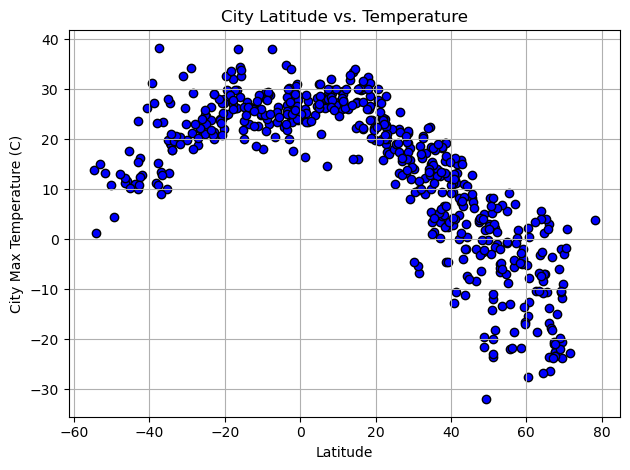

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("City Max Temperature (C)")
plt.title("City Latitude vs. Temperature")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

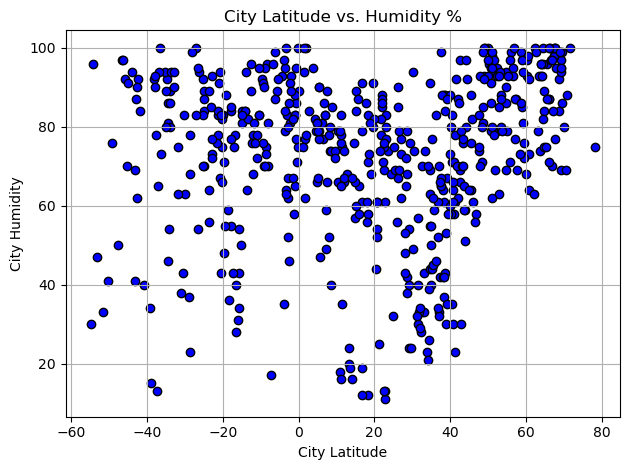

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],  marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("City Humidity")
plt.title("City Latitude vs. Humidity %")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

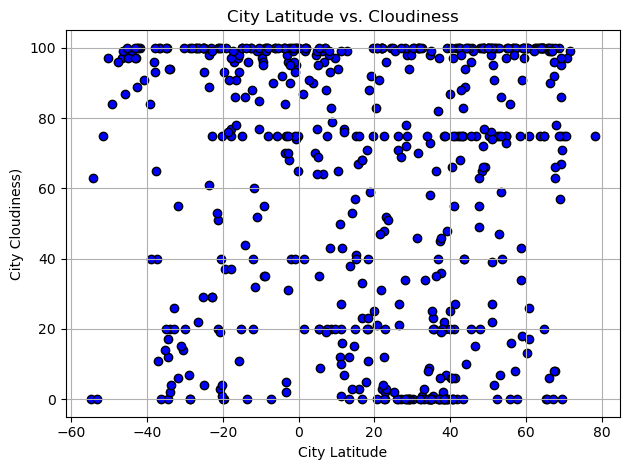

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

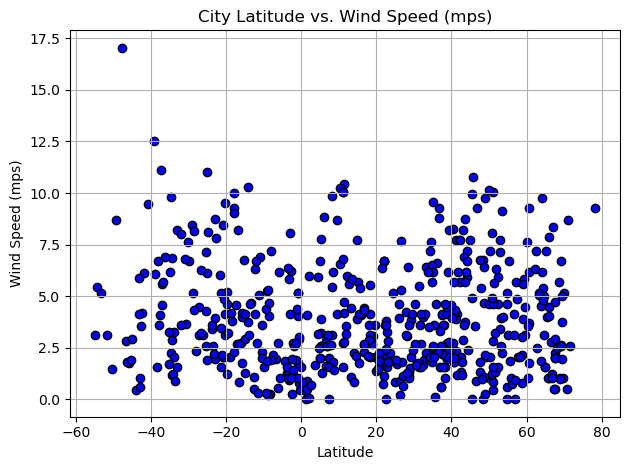

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
plt.title("City Latitude vs. Wind Speed (mps)")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ilulissat,69.2167,-51.1000,-1.99,69,75,6.69,GL,1701109156
2,tamanrasset,22.7850,5.5228,18.95,11,0,2.06,DZ,1701109157
3,westport,41.1415,-73.3579,11.90,58,20,7.72,US,1701108953
5,vorgashor,67.5833,63.9500,-22.54,98,8,2.08,RU,1701109159
7,yuzhno-kurilsk,44.0306,145.8556,2.99,51,89,5.91,RU,1701109159


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,13.25,33,75,3.09,CL,1701109155
4,waitangi,-43.9535,-176.5597,11.01,94,99,0.45,NZ,1701109157
6,bredasdorp,-34.5322,20.0403,19.22,81,12,2.26,ZA,1701109159
11,blackmans bay,-43.0167,147.3167,10.07,87,97,1.01,AU,1701109160
13,port elizabeth,-33.9180,25.5701,19.16,89,20,2.06,ZA,1701109161


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7593868220203938


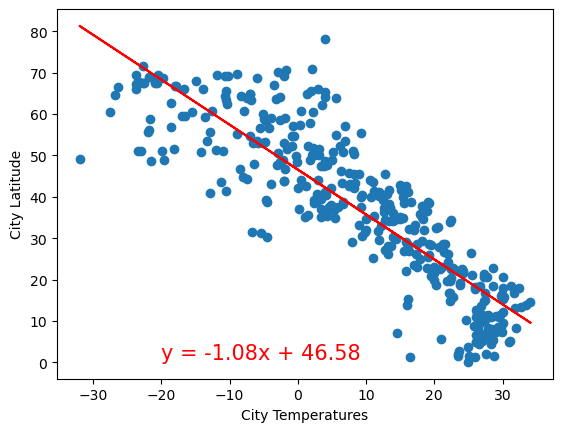

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Max Temp']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,0.8),fontsize=15,color="red")
plt.xlabel('City Temperatures')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3886906653206195


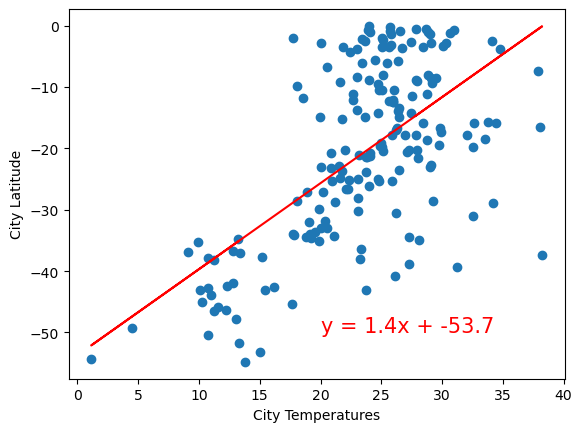

In [30]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Max Temp']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('City Temperatures')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()



**Discussion about the linear relationship:** The Northern hemisphere has a very strong correlation between temperature and latitude as can be seen from the scatterplots above - the closer the latitude to the equator, the higher the temperature goes while conversely, the further away, the colder it gets! The r-squared score of the Northern hemi is almost 0.8.
In the Southern hemisphere, the r-squared score is less than 0.4 but there is still a relatively strong correlation between higher temperatures and distance from the equator.


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.12884961427499794


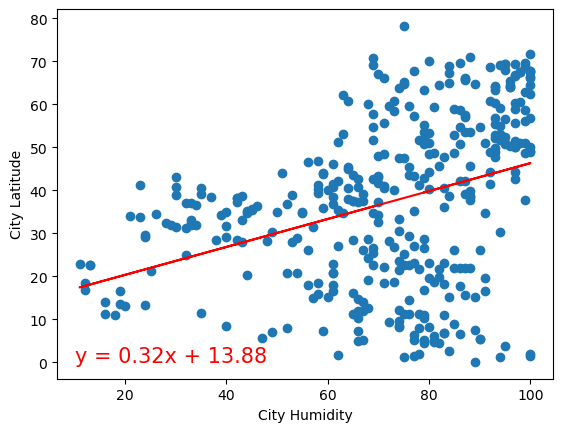

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('City Humidity')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.01836532349123006


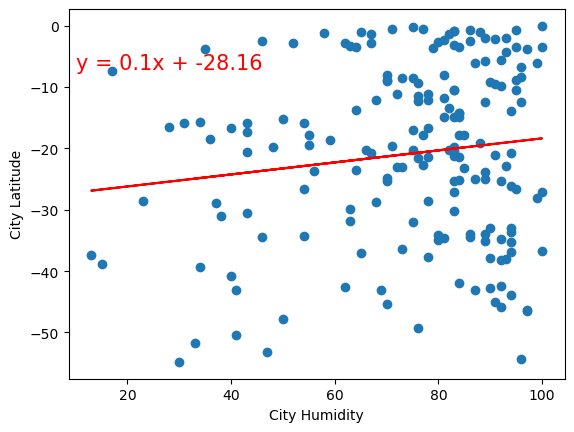

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-7
                     ),fontsize=15,color="red")
plt.xlabel('City Humidity')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a very slightly positive relationship between humidity and latitude in both the Northern and Southern Hemispheres as can be seen from the plots although both r-squared scores are less than 0.1 indicating that the relationship is not very strong.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.028673810690178915


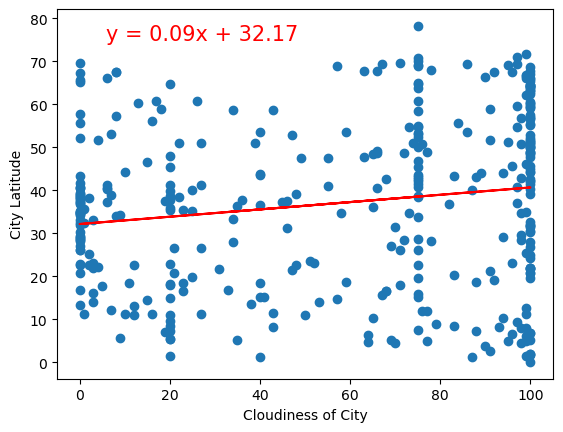

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df['Cloudiness']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,75),fontsize=15,color="red")
plt.xlabel('Cloudiness of City')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.01703190242723916


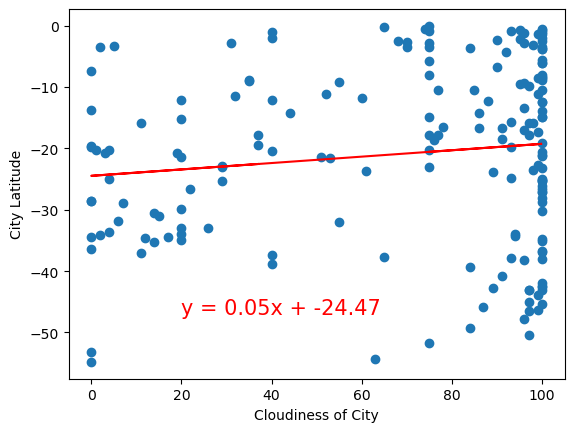

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df['Cloudiness']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, -47),fontsize=15,color="red")
plt.xlabel('Cloudiness of City')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is not a strong positive or negative correlation between Cloudiness and Latitude. Both scatterplots show almost perfectly horizontal lines and the r-squared scores are both ~ 0.03, solidifying this point.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.004976804400181332


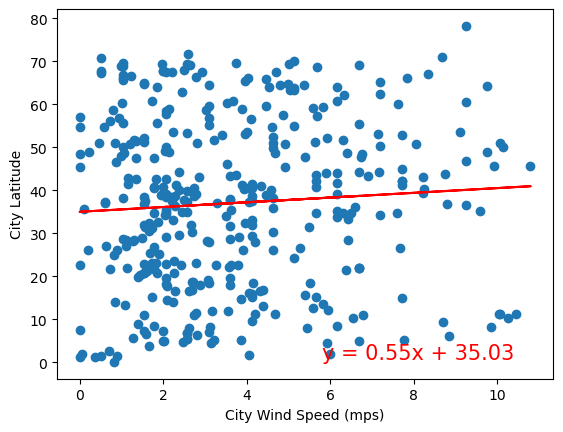

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df['Wind Speed']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('City Wind Speed (mps)')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.06842220178955497


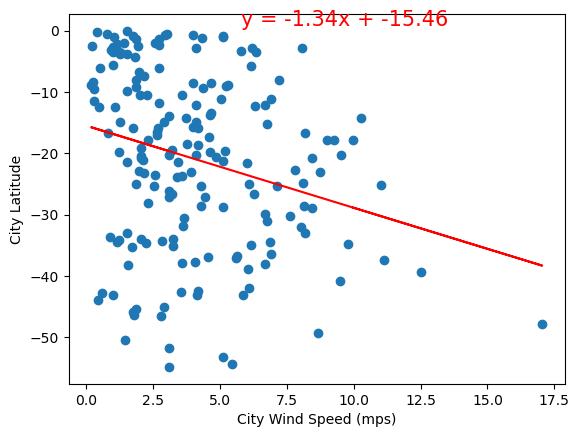

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df['Wind Speed']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('City Wind Speed (mps)')
plt.ylabel('City Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There does not appear to be a strong positive or negative correlation between wind speed and latitude in either hemisphere.